In [6]:
# Allow output for every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from pybaseball import statcast

# Scrape the last game of the 2019 World Series (Game 7, Oct 30, 2019)
data = statcast(start_dt='2019-10-30', end_dt='2019-10-30')

# Filter the dataset for the relevant game (2019-10-30)
data_filtered = data[data['game_date'] == '2019-10-30']

# Define pitch types for fastballs and off-speed
fastball_types = ['FA', 'FF', 'FT', 'FC', 'FS', 'SI', 'SF']
off_speed_types = ['SL', 'CH', 'CB', 'CU', 'KC', 'KN', 'EP']

# Initialize an empty dictionary to hold pitch counts
pitch_counts = {}

# Loop through each pitcher and calculate their pitch type percentages
for pitcher in data_filtered['player_name'].unique():
    pitcher_data = data_filtered[data_filtered['player_name'] == pitcher]
    
    # Total pitches for the pitcher
    total_pitches = len(pitcher_data)
    
    # Use np.in1d to check if the pitch type is in the list of fastballs or off-speed pitches
    fastballs = np.count_nonzero(np.in1d(pitcher_data['pitch_type'], fastball_types))
    off_speed = np.count_nonzero(np.in1d(pitcher_data['pitch_type'], off_speed_types))
    
    # Calculate percentages
    fastball_percentage = (fastballs / total_pitches) * 100
    off_speed_percentage = (off_speed / total_pitches) * 100
    
    # Store the results
    pitch_counts[pitcher] = {
        'Total Pitches': total_pitches,
        'Fastballs': fastball_percentage,
        'Off-speed': off_speed_percentage
    }

# Convert the pitch counts dictionary to a DataFrame
pitch_counts_df = pd.DataFrame.from_dict(pitch_counts, orient='index')

# Sort the DataFrame by 'Total Pitches' in descending order
pitch_counts_df = pitch_counts_df.sort_values(by='Total Pitches', ascending=False)

# Print out the results for each pitcher
for pitcher, row in pitch_counts_df.iterrows():
    print(f"{pitcher} - Total Pitches: {int(row['Total Pitches'])} | "
          f"Fastballs: {row['Fastballs']:.2f}% | Off-speed: {row['Off-speed']:.2f}%")


This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  9.34it/s]

Scherzer, Max - Total Pitches: 103 | Fastballs: 57.28% | Off-speed: 42.72%
Greinke, Zack - Total Pitches: 80 | Fastballs: 45.00% | Off-speed: 55.00%
Corbin, Patrick - Total Pitches: 44 | Fastballs: 59.09% | Off-speed: 40.91%
Osuna, Roberto - Total Pitches: 36 | Fastballs: 72.22% | Off-speed: 27.78%
Smith, Joe - Total Pitches: 15 | Fastballs: 66.67% | Off-speed: 33.33%
Hudson, Daniel - Total Pitches: 12 | Fastballs: 83.33% | Off-speed: 16.67%
Urquidy, José - Total Pitches: 10 | Fastballs: 50.00% | Off-speed: 30.00%
Harris, Will - Total Pitches: 5 | Fastballs: 40.00% | Off-speed: 60.00%
Pressly, Ryan - Total Pitches: 2 | Fastballs: 0.00% | Off-speed: 100.00%


<BarContainer object of 9 artists>

<BarContainer object of 9 artists>

Text(0.5, 0, 'Pitcher')

Text(0, 0.5, 'Percentage of Pitches')

Text(0.5, 1.0, 'Pitch Type Distribution by Pitcher')

[Text(0, 0, 'Hudson, Daniel'),
 Text(1, 0, 'Urquidy, José'),
 Text(2, 0, 'Smith, Joe'),
 Text(3, 0, 'Corbin, Patrick'),
 Text(4, 0, 'Pressly, Ryan'),
 Text(5, 0, 'Osuna, Roberto'),
 Text(6, 0, 'Harris, Will'),
 Text(7, 0, 'Greinke, Zack'),
 Text(8, 0, 'Scherzer, Max')]

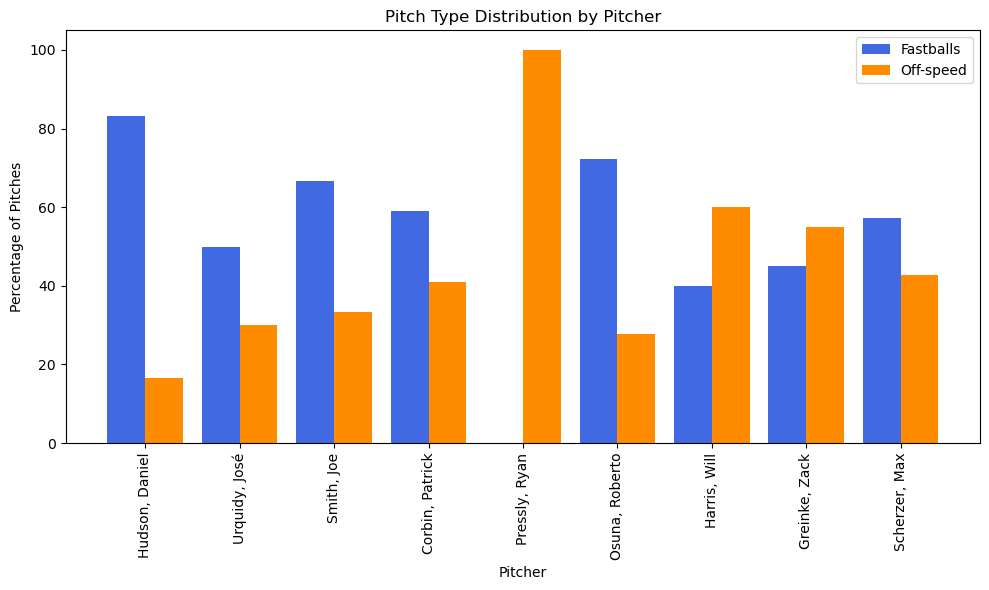

In [7]:
import matplotlib.pyplot as plt

# Create lists of pitchers and their fastball and off-speed usage
pitchers = list(pitch_counts.keys())
fastball_percentages = [data['Fastballs'] for data in pitch_counts.values()]
offspeed_percentages = [data['Off-speed'] for data in pitch_counts.values()]

# Plot bar chart for each pitcher
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.4  # width of bars
x = np.arange(len(pitchers))  # The label locations

ax.bar(x - width/2, fastball_percentages, width, label='Fastballs', color='royalblue')
ax.bar(x + width/2, offspeed_percentages, width, label='Off-speed', color='darkorange')

# Labeling the chart
ax.set_xlabel('Pitcher')
ax.set_ylabel('Percentage of Pitches')
ax.set_title('Pitch Type Distribution by Pitcher')
ax.set_xticks(x)
ax.set_xticklabels(pitchers, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()
